# Intro

[scikit-image](https://scikit-image.org/docs/stable/) documentation.

It comes with some sample images to work with.

In [62]:
from skimage import data, color, filters
import numpy as np
import matplotlib.pyplot as plt

In [24]:
cell = data.cell()

In [25]:
# data loads as:
type(cell)

numpy.ndarray

In [26]:
# quickly checking shape will indicate the No of colour channels:
np.shape(cell)
# 660 pixels wide, 550 height. 1 color band only.

(660, 550)

(-0.5, 549.5, 659.5, -0.5)

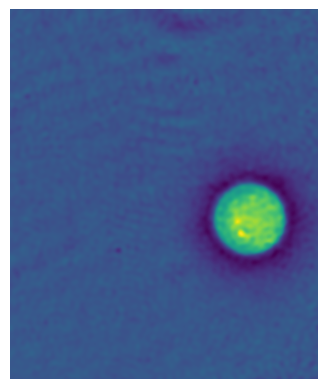

In [27]:
plt.imshow(cell) # apply a colormap
plt.axis("off")

(1411, 1411, 3)


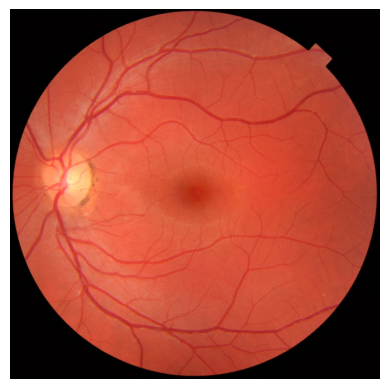

In [28]:
i = data.retina()
plt.axis("off")
print(np.shape(i)) # rgb img
plt.imshow(i) 

## Convert to Grayscale

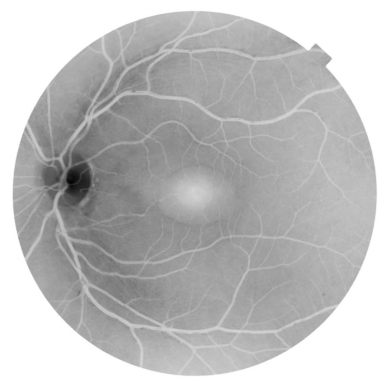

In [29]:
plt.clf()
ret_grays = color.rgb2gray(i)
plt.axis("off")
plt.imshow(ret_grays, cmap="Greys")

***

## NumPy Transformations

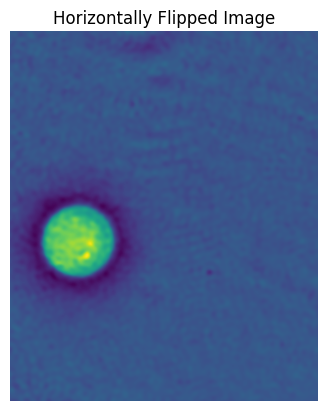

In [30]:
horz_flip_cell = np.fliplr(cell)
plt.axis("off")
plt.title("Horizontally Flipped Image")
plt.imshow(horz_flip_cell)

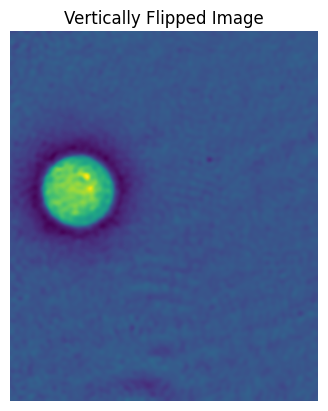

In [31]:
vert_flip_cell = np.flipud(horz_flip_cell)
plt.axis("off")
plt.title("Vertically Flipped Image")
plt.imshow(vert_flip_cell)

***
## Analysing Color Bands

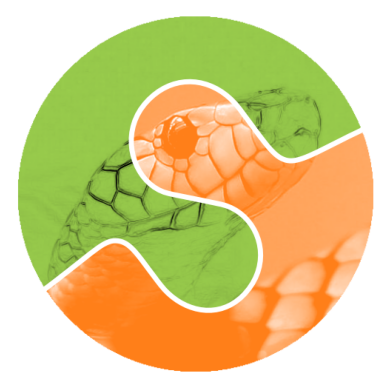

In [32]:
skimg_logo = data.logo()
plt.axis("off")
plt.imshow(skimg_logo)
# should be quite green & some red, low blue

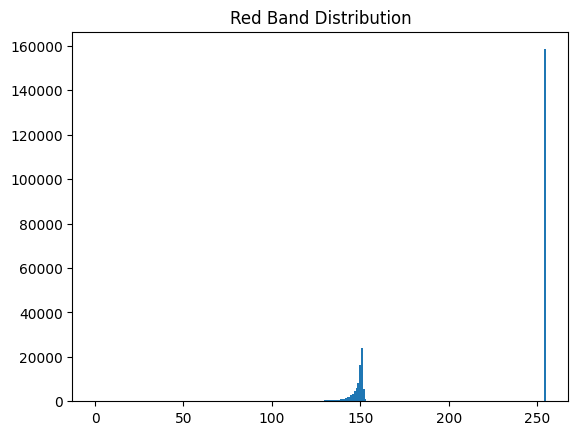

In [33]:
rd_band = skimg_logo[:,:,0]
plt.title("Red Band Distribution")
# analyse with histogram
plt.hist(rd_band.ravel(), bins=256)
plt.show()

For each of the 255 intensities of color in this band, there is a limited distribution at mid and high intensities. 
The lower the x axis the darker the pixel.

Notice that we use `.ravel()` to flatten the ndarray prior to plotting it with hist.

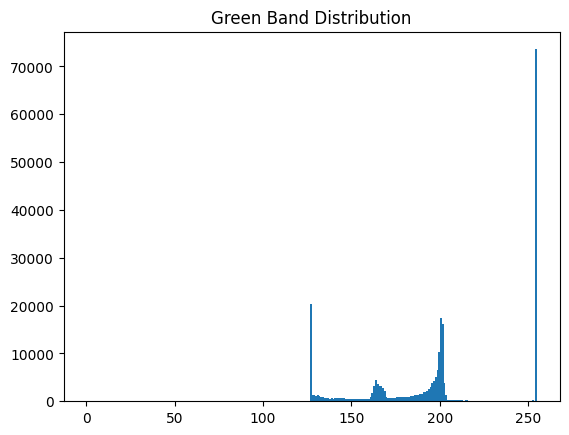

In [34]:
grn_channel = skimg_logo[:,:,1]
plt.title("Green Band Distribution")
plt.hist(grn_channel.ravel(), bins=256)
plt.show()

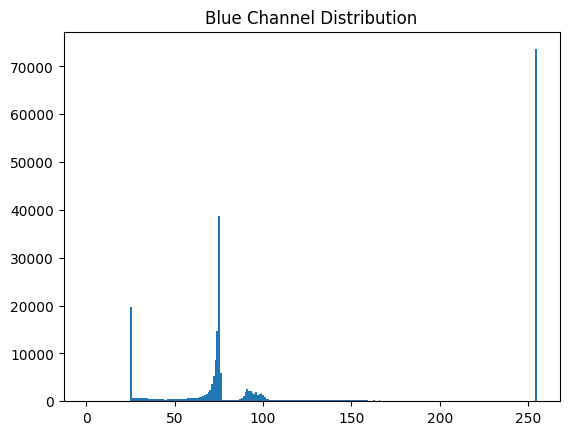

In [35]:
blue_chnl = skimg_logo[:,:,[2]]
plt.title("Blue Channel Distribution")
plt.hist(blue_chnl.ravel(), bins=256)
plt.show()

***
## Thresholding

This is an important step in pre-processing images. It allows for easier identification of features. Simply select (or have skimage find the optimal) a value to binarize the pixels. A number between 0 and 255, each pixel will either test True or False and all grayscales will be eliminated. 

**It's important to ensure you are working in grayscales to be able to perform these operations**.

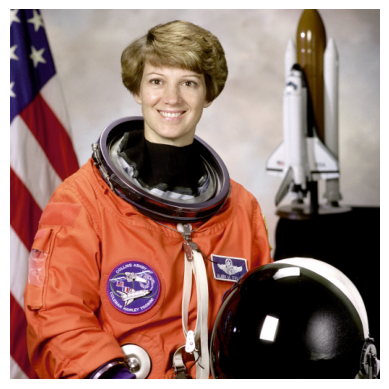

In [40]:
astro = data.astronaut()
plt.axis("off")
plt.imshow(astro)

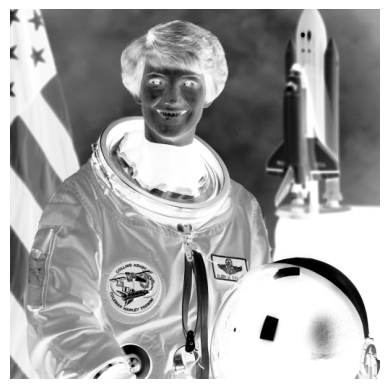

In [43]:
grayscale_astro = color.rgb2gray(astro)
plt.axis("off")
plt.imshow(grayscale_astro, cmap="Greys")

### Global Thresholding

Useful for when the background is consistent. Applies a blanket value to teh np
nd array. This is performant. 

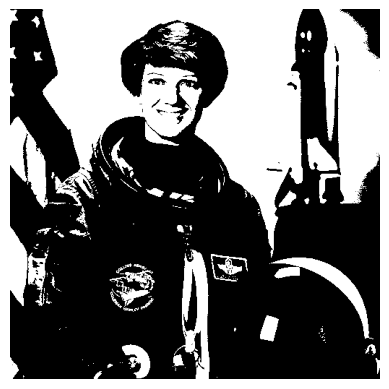

In [61]:
thresh = 0.6
thresh_astr = grayscale_astro < thresh
plt.imshow(thresh_astr, cmap="Greys")
plt.axis("off")
plt.show()
# manual trial and error in finding the threshold

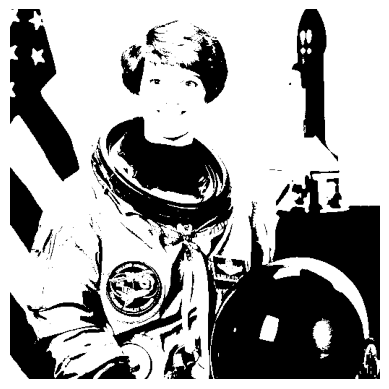

In [65]:
# automate threshold detection
thresh_otsu = filters.threshold_otsu(grayscale_astro)
thresh_astr = grayscale_astro < thresh_otsu
plt.imshow(thresh_astr, cmap="Greys")
plt.axis("off")
plt.show()

### Local Thresholding

For when the exposure or quality of the background is not reliable. This
applies region-specific thresholds to the np ndarry, based on the block size &
offset parameters. This is less performant than global thresholding.

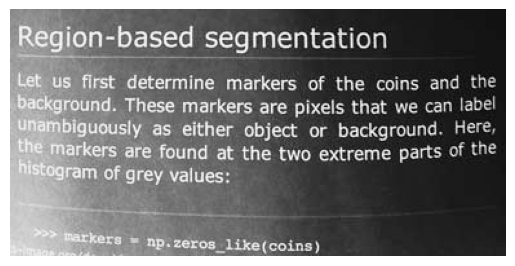

In [68]:
page = data.page()
plt.axis("off")
plt.imshow(page, cmap="Greys")

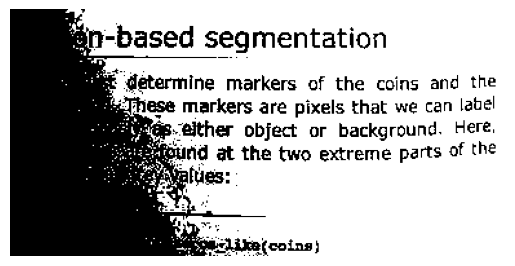

In [70]:
global_thresh = filters.threshold_otsu(page)
global_page = page < global_thresh
plt.axis("off")
plt.imshow(global_page, cmap="Greys")
# Not good

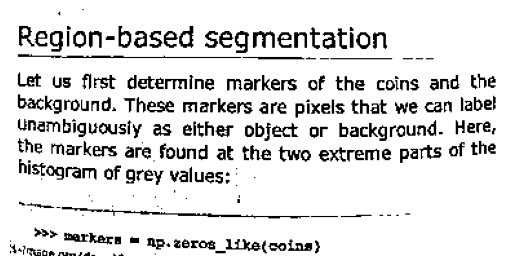

In [74]:
# Now with local thresholding
local_thresh = filters.threshold_local(page, block_size=35, offset=10)
local_page = page < local_thresh
plt.axis("off")
plt.imshow(local_page, cmap="Greys")
# Much better

### Try all filters

Not sure which filter method to apply? No worries, skimage helps you to try them all.

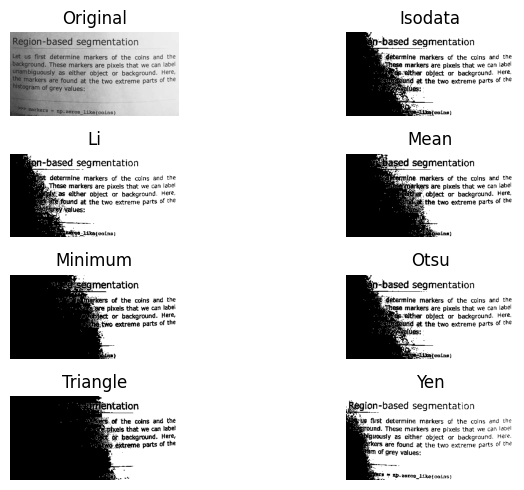

In [76]:
fig, ax = filters.try_all_threshold(page, verbose=False)
plt.show()
# In terms of global filters, looks like Yen yields best results in this
# instance.